<a href="https://colab.research.google.com/github/ranicah/CapstoneProject3/blob/main/Capstone3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Background

 **Customer Life Value atau CLV**, adalah ukuran seberapa berharganya seorang pelanggan bagi perusahaan. Dari nilai ini, perusahaan dapat menentukan berapa banyak keuntungan yang diperoleh dari satu penumpang dan biaya yang dikeluarkan untuk mendapatkan atau mempertahankan pelanggan baru. Angka ini cukup penting bagi perusahaan untuk mengetahui apakah perusahaan ingin menargetkan pemasaran kepada pelanggan berharga secara efektif dan bagaimana pelanggan perusahaan akan berubah di masa mendatang.


 **Menghitung CLV dapat menggunakan rumus:**
 CLV = Rata-rata nilai transaksi x (Jumlah transaksi dalam satu tahun x Waktu retensi)

Waktu retensi adalah durasi hubungan bisnis antara Anda dengan pelanggan. Angkanya bisa sangat variatif, mengikuti produk atau jasa yang Anda tawarkan atau bahkan mengikuti cara pelanggan mengonsumsi produk.

**Manfaat CLV:**
1. Meningkatkan loyalitas pelanggan
2. Optimalkan strategi pemasaran
3. Meningkatkan laba perusahaan


**Latar Belakang:**

Pada capstone ini, diambil contoh pada perusahaan Elektronik EL, dimana perusahaan ingin mengoptimalkan layanan jasa mereka terhadap pelanggan dengan marketing yang belum fokus ditujukan untuk siapa sehingga biaya marketing membludak dan harus menekan biaya operasional lainnya.

**Pemahaman Bisnis dan Tujuan:**

Perusahaan ingin melihat seberapa tepat nilai prediksi dari pelanggan untuk menentukan pelanggan VIP (CLV tinggi) yang bertujuan untuk alokasi anggaran marketing dapat digunakan secara optimal.

================================================================================

**Definisi perkolom** yang tersedia dalam dataset antara lain:

  Vehincle Class = Nama Kendaraan yang dimiliki pelanggan

  Coverage = Tipe asuransi

  Renew Offer Type = Pembaharuan tipe asuransi

  Employment Status = Status pelanggan

  Marital Status = Hubungan pelanggan

  Education Status = Tingkat pendidikan pelanggan

  Number of Policies = Jumlah asuransi produk

  Monthly Premium Auto = Jumlah bulanan yang telah dibayarkan

  Total Claim Amount = Total yang telah diklaim

  Income = Pendapatan pelanggan

  Customer Lifetime Value = Nilai pelanggan terhadap perusahaan (Kolom Target)

================================================================================

#**Load Dataset**

In [ ]:
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical calculations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns # For more interesting data visualization
import missingno as msno # For identifying and visualizing missing data
from scipy import stats
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import kruskal
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold



# model
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

In [ ]:
data = pd.read_csv("/content/data_customer_lifetime_value.csv")
data

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
0,Four-Door Car,Extended,Offer1,Retired,Divorced,High School or Below,2,90,571.479602,11828,10083.486880
1,Four-Door Car,Basic,Offer1,Employed,Married,College,6,62,114.514440,44762,4943.386117
2,Two-Door Car,Basic,Offer1,Retired,Married,Master,2,62,257.248789,21514,11981.984810
3,Four-Door Car,Premium,Offer3,Disabled,Married,High School or Below,1,116,556.800000,17913,4550.856045
4,Two-Door Car,Basic,Offer3,Medical Leave,Married,High School or Below,1,62,355.820799,19030,2372.155492
...,...,...,...,...,...,...,...,...,...,...,...
5664,Four-Door Car,Basic,Offer4,Unemployed,Single,High School or Below,1,74,532.800000,0,2442.216651
5665,Four-Door Car,Premium,Offer1,Employed,Divorced,Bachelor,2,109,523.200000,27778,12904.943360
5666,Four-Door Car,Basic,Offer1,Employed,Single,Bachelor,1,62,44.780402,84658,2447.053134
5667,Luxury SUV,Extended,Offer2,Employed,Divorced,Master,7,239,1294.700423,22705,19160.989940


# **Data Understanding**

## **Melihat Kolom**

In [ ]:
data.columns

Index(['Vehicle Class', 'Coverage', 'Renew Offer Type', 'EmploymentStatus',
       'Marital Status', 'Education', 'Number of Policies',
       'Monthly Premium Auto', 'Total Claim Amount', 'Income',
       'Customer Lifetime Value'],
      dtype='object')

## **Informasi Data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5669 entries, 0 to 5668
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Vehicle Class            5669 non-null   object 
 1   Coverage                 5669 non-null   object 
 2   Renew Offer Type         5669 non-null   object 
 3   EmploymentStatus         5669 non-null   object 
 4   Marital Status           5669 non-null   object 
 5   Education                5669 non-null   object 
 6   Number of Policies       5669 non-null   int64  
 7   Monthly Premium Auto     5669 non-null   int64  
 8   Total Claim Amount       5669 non-null   float64
 9   Income                   5669 non-null   int64  
 10  Customer Lifetime Value  5669 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 487.3+ KB


## **Missing Value**

In [ ]:
data1 = data.isna().sum()
print(data1)

Vehicle Class              0
Coverage                   0
Renew Offer Type           0
EmploymentStatus           0
Marital Status             0
Education                  0
Number of Policies         0
Monthly Premium Auto       0
Total Claim Amount         0
Income                     0
Customer Lifetime Value    0
dtype: int64


### **Posisi Missing Value**

<Axes: >

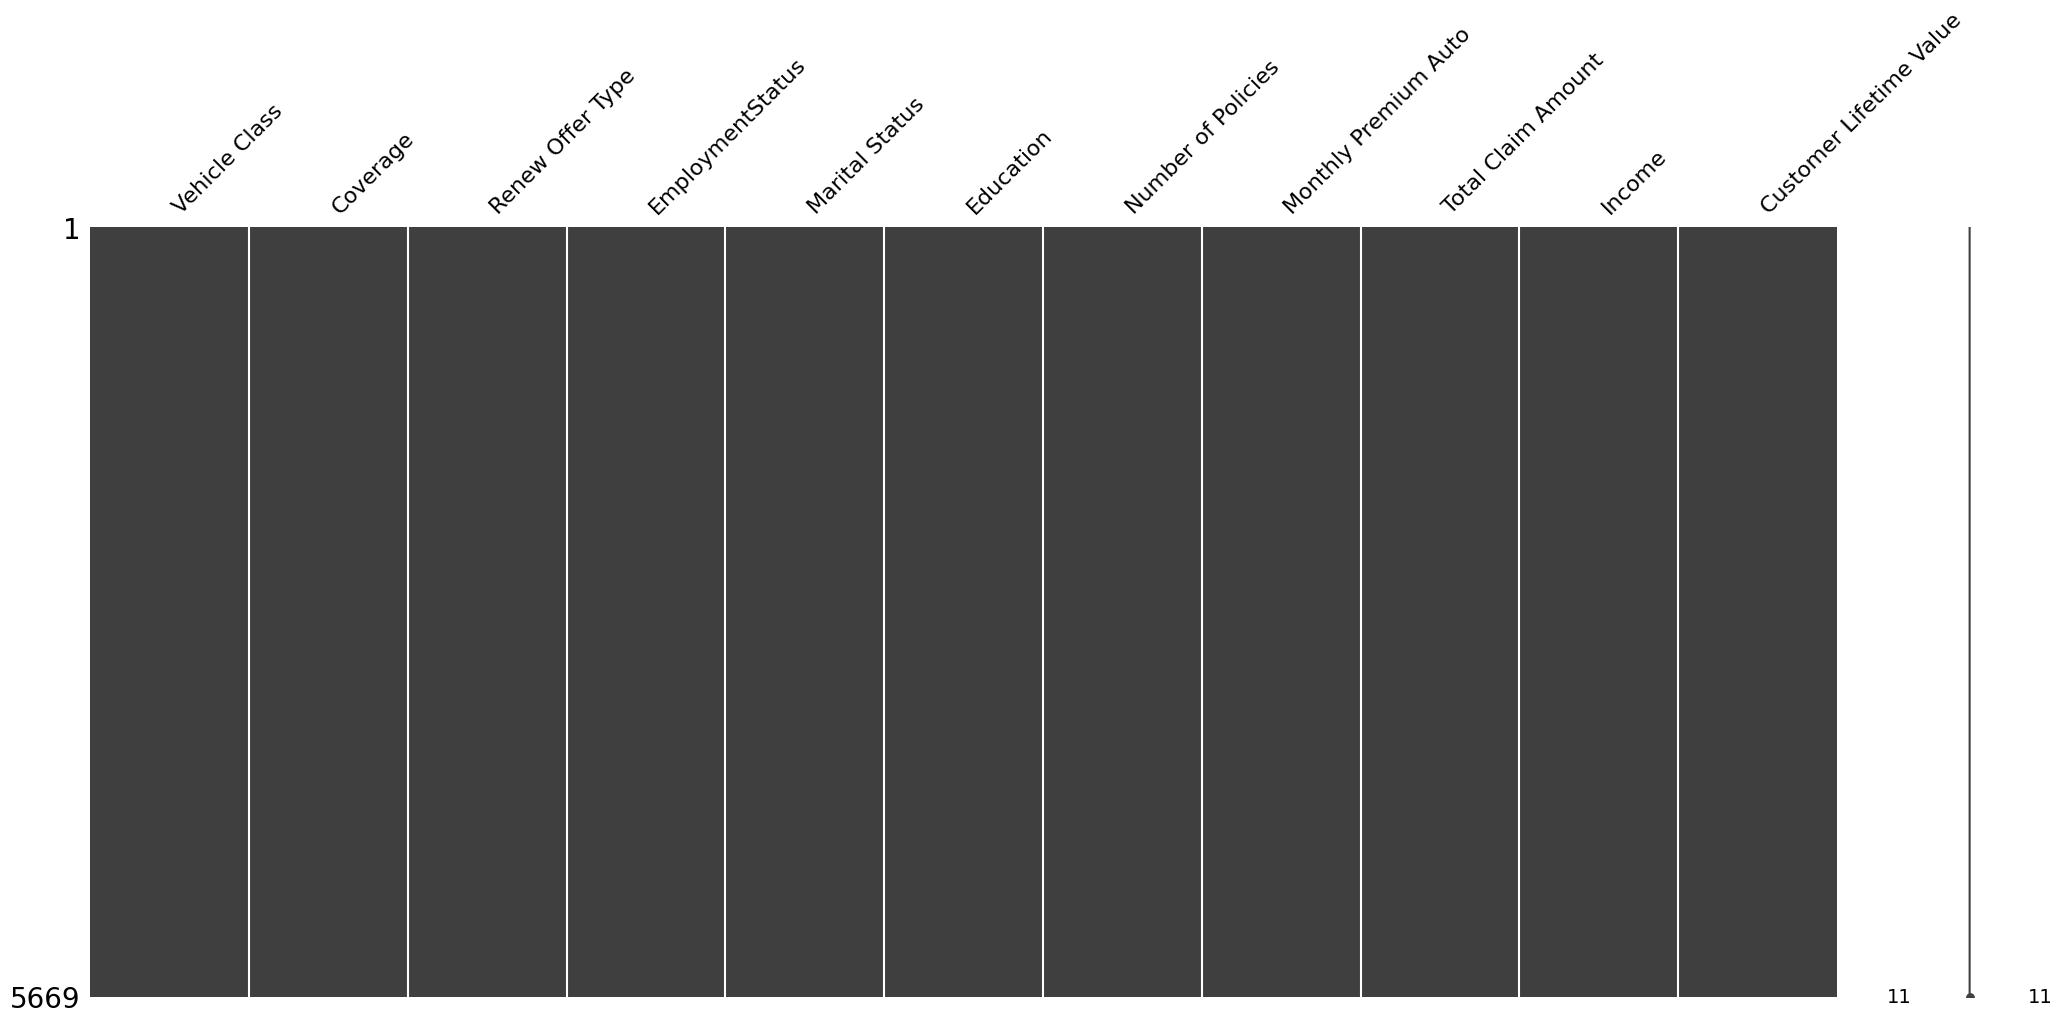

In [ ]:
msno.matrix(data)

## **Data Duplikat**

In [ ]:
data.duplicated().sum()

np.int64(618)

### **Drop Duplikat**

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

np.int64(0)

## **Exploratory Data Analysis**

### **Descriptive Statistics**

In [ ]:
data.describe()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
count,5051.000000,5051.000000,5051.000000,5051.000000,5051.000000
mean,2.992081,92.911107,429.798954,37739.838448,8059.483178
std,2.386500,34.335010,293.129102,30691.452111,6989.189674
min,1.000000,61.000000,0.423310,0.000000,1898.007675
25%,1.000000,68.000000,251.776304,0.000000,3964.441004
50%,2.000000,82.000000,374.400000,34322.000000,5837.528088
75%,4.000000,109.000000,548.123122,62471.500000,9028.564632
max,9.000000,297.000000,2759.794354,99934.000000,83325.381190


### **Korelasi**

In [ ]:
data.select_dtypes(include="number").corr()

,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
Number of Policies,1.000000,0.013674,0.008952,-0.014334,0.022143
Monthly Premium Auto,0.013674,1.000000,0.626201,-0.015356,0.417090
Total Claim Amount,0.008952,0.626201,1.000000,-0.361002,0.211937
Income,-0.014334,-0.015356,-0.361002,1.000000,0.036998
Customer Lifetime Value,0.022143,0.417090,0.211937,0.036998,1.000000


###**Grafik Histogram**

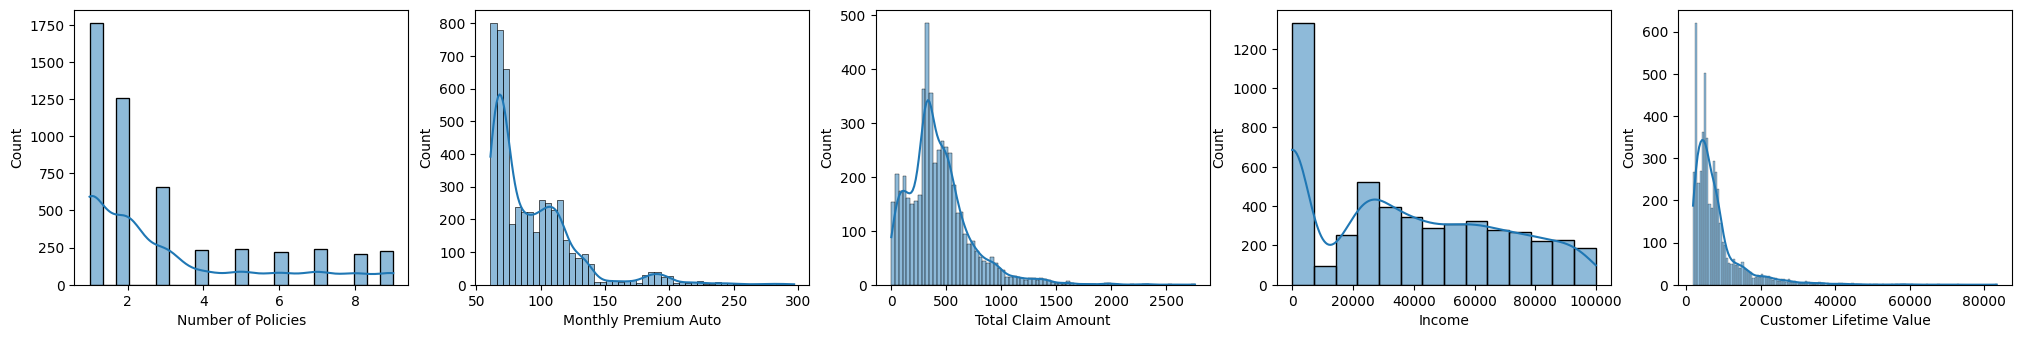

In [ ]:
hist_numeric = data.select_dtypes(include = 'number')

plt.figure(figsize = (25,25)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.histplot(data[kolom], kde = True)
    posisi += 1

# print graph
plt.show()

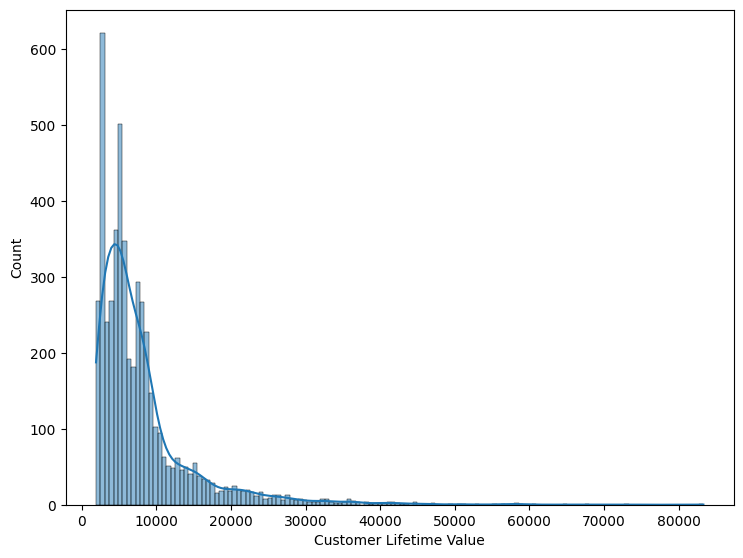

In [ ]:
# Melihat lebih detail plot histogram CLV

hist_numeric = data[['Customer Lifetime Value']]

plt.figure(figsize = (50,45)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.histplot(data[kolom], kde = True)
    posisi += 1

# print graph
plt.show()

Histogram CLV termasuk ke dalam *right skewed distribution*. Sebagian besar pelanggan memiliki CLV relatif rendah.

###**Outlier**

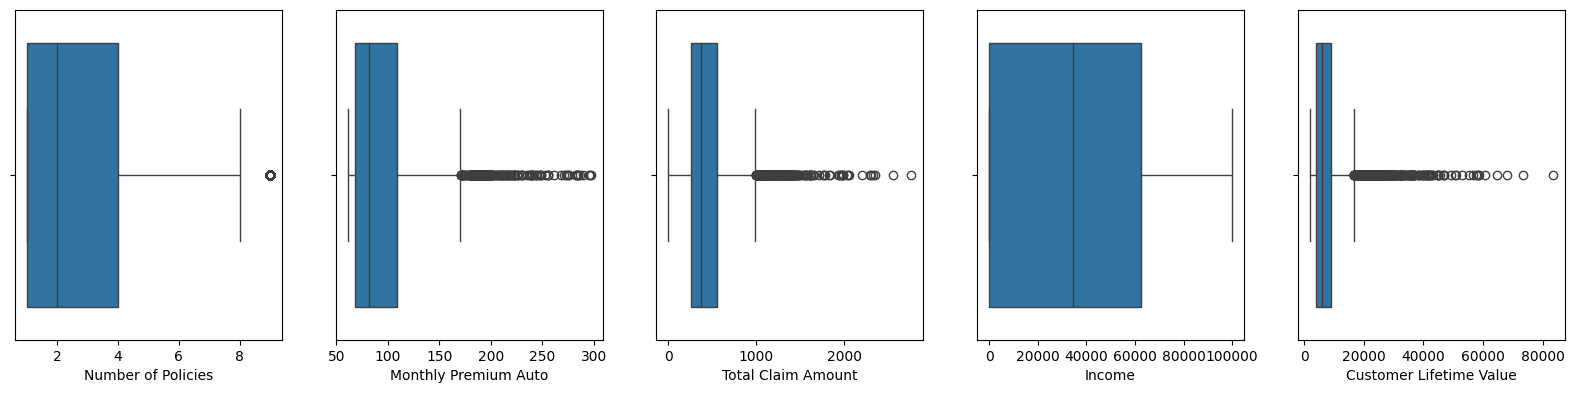

In [ ]:
hist_numeric = data.select_dtypes(include = 'number')

plt.figure(figsize = (20,30)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.boxplot(x=data[kolom])
    posisi += 1

# print graph
plt.show()

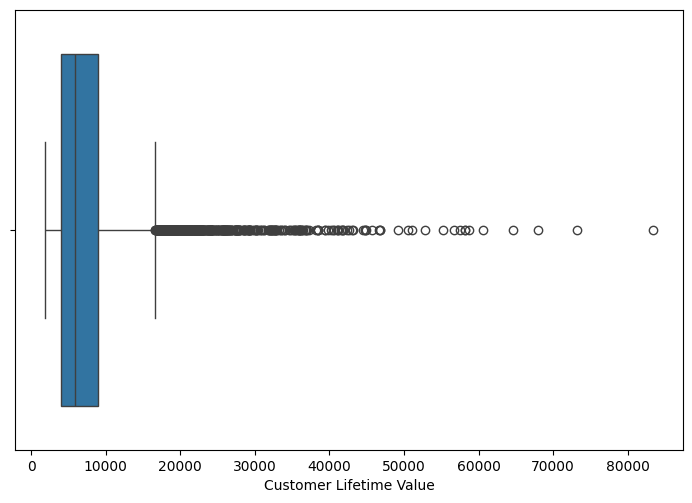

In [ ]:
#Melihat lebih detail outlier dari CLV

hist_numeric = data[['Customer Lifetime Value']]

plt.figure(figsize = (50,40)) # (column, row)
posisi = 1
for kolom in hist_numeric.columns:
    plt.subplot(6, 5, posisi) # (row, column, position)
    sns.boxplot(x=data[kolom])
    posisi += 1

# print graph
plt.show()

###**IQR**

In [ ]:
numeric_columns = data.select_dtypes(include='number')
list_outliers_count = []

for column in numeric_columns.columns:
    q3 = numeric_columns.describe().loc['75%', column]
    q1 = numeric_columns.describe().loc['25%', column]
    iqr = q3 - q1
    whisker = 1.5 * iqr
    upper_bound = q3 + whisker
    lower_bound = q1 - whisker

    # Count of outliers
    outliers_count = len(data[(data[column] > upper_bound) | (data[column] < lower_bound)])
    list_outliers_count.append(outliers_count)

outliers_data = pd.DataFrame({
    'Column': numeric_columns.columns,
    'Outliers Count': list_outliers_count
})

In [ ]:
outliers_data_sorted = outliers_data.sort_values(by='Outliers Count', ascending=False)
print(outliers_data_sorted)

                    Column  Outliers Count
4  Customer Lifetime Value             449
1     Monthly Premium Auto             252
0       Number of Policies             228
2       Total Claim Amount             217
3                   Income               0


Analisis apakah outlier perlu dihapus atau tidak

####**Outlier di Customer Lifetime Value**

In [ ]:
data[data['Customer Lifetime Value'] >= 60000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
849,Luxury Car,Extended,Offer1,Unemployed,Married,High School or Below,2,217,1562.400000,0,64618.75715
1014,Luxury SUV,Extended,Offer1,Unemployed,Married,College,2,204,979.200000,0,60556.19213
1091,Luxury Car,Extended,Offer1,Employed,Married,High School or Below,2,231,1108.800000,58958,83325.38119
1311,Luxury SUV,Extended,Offer1,Employed,Married,Bachelor,2,202,969.600000,39547,73225.95652
1527,Sports Car,Premium,Offer1,Employed,Married,Bachelor,2,192,151.711475,78310,67907.27050


CLV masing-masing customer memiliki nilai yang berbeda-beda sehingga outlier masih dapat diterima

####**Outlier di Monthly Premium Auto**

In [ ]:
data[data['Monthly Premium Auto'] >= 150]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
36,Luxury SUV,Basic,Offer2,Unemployed,Single,High School or Below,1,192,1921.248929,0,6745.248379
56,Luxury Car,Basic,Offer1,Employed,Married,Bachelor,8,191,981.010879,38183,15277.477960
65,SUV,Premium,Offer1,Unemployed,Single,College,2,165,1452.213743,0,16350.130610
79,SUV,Premium,Offer4,Employed,Married,Doctor,1,194,469.257835,67787,7751.927614
80,Luxury SUV,Basic,Offer2,Employed,Married,Bachelor,3,194,1067.291208,89464,15415.044070
...,...,...,...,...,...,...,...,...,...,...,...
5628,SUV,Premium,Offer1,Unemployed,Married,Bachelor,1,172,825.600000,0,6285.019179
5629,Luxury Car,Basic,Offer1,Employed,Divorced,Bachelor,1,193,926.400000,74365,7769.841954
5661,Luxury SUV,Basic,Offer3,Employed,Married,College,1,187,897.600000,43406,7457.344801
5662,Luxury Car,Premium,Offer2,Employed,Married,Doctor,9,296,498.159874,79655,23984.621440


Monthly premium auto per pelanggan memiliki nilai yang berbeda sehingga outlier dapat diterima

####**Outlier di Number of Policies**

In [ ]:
data[data['Number of Policies'] > 8]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
57,Sports Car,Extended,Offer1,Unemployed,Single,Master,9,122,650.521790,0,9031.214859
108,Four-Door Car,Extended,Offer3,Employed,Married,High School or Below,9,84,114.815893,22244,6686.128629
136,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor,9,61,40.562432,61613,4825.651946
158,Four-Door Car,Basic,Offer2,Medical Leave,Single,College,9,63,302.400000,22571,4605.036646
159,Four-Door Car,Basic,Offer3,Employed,Married,College,9,70,336.000000,59782,5626.572446
...,...,...,...,...,...,...,...,...,...,...,...
5617,Four-Door Car,Extended,Offer4,Unemployed,Married,College,9,83,398.400000,0,5996.065073
5630,Four-Door Car,Basic,Offer1,Retired,Divorced,High School or Below,9,68,326.400000,20862,4794.481412
5645,Four-Door Car,Extended,Offer3,Retired,Married,Master,9,93,498.452698,16224,7031.463693
5655,Two-Door Car,Basic,Offer1,Unemployed,Married,Bachelor,9,67,132.443705,0,4927.707574


Beberapa pelanggan memiliki nilai number of policies nya 9 sehingga outlier dapat diterima

####**Outlier di Total Claim Amount**

In [ ]:
data[data['Total Claim Amount'] > 1000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
17,SUV,Extended,Offer1,Unemployed,Single,College,1,129,1178.950186,0,4711.845199
36,Luxury SUV,Basic,Offer2,Unemployed,Single,High School or Below,1,192,1921.248929,0,6745.248379
65,SUV,Premium,Offer1,Unemployed,Single,College,2,165,1452.213743,0,16350.130610
80,Luxury SUV,Basic,Offer2,Employed,Married,Bachelor,3,194,1067.291208,89464,15415.044070
111,Luxury Car,Basic,Offer1,Unemployed,Single,Bachelor,1,189,1823.730828,0,6297.002886
...,...,...,...,...,...,...,...,...,...,...,...
5576,Luxury SUV,Basic,Offer4,Unemployed,Single,High School or Below,1,194,2306.508397,0,6601.611299
5599,Sports Car,Extended,Offer2,Unemployed,Single,High School or Below,3,133,1361.993232,0,9415.901707
5626,SUV,Basic,Offer1,Medical Leave,Divorced,High School or Below,6,117,1138.255325,17331,8991.984520
5631,Four-Door Car,Premium,Offer1,Unemployed,Single,High School or Below,3,116,1193.115879,0,8491.465719


Total claim amount setiap pelanggan berbeda-beda sehingga outlier dapat diterima

In [ ]:
data[data['Customer Lifetime Value'] > 60000]

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education,Number of Policies,Monthly Premium Auto,Total Claim Amount,Income,Customer Lifetime Value
849,Luxury Car,Extended,Offer1,Unemployed,Married,High School or Below,2,217,1562.400000,0,64618.75715
1014,Luxury SUV,Extended,Offer1,Unemployed,Married,College,2,204,979.200000,0,60556.19213
1091,Luxury Car,Extended,Offer1,Employed,Married,High School or Below,2,231,1108.800000,58958,83325.38119
1311,Luxury SUV,Extended,Offer1,Employed,Married,Bachelor,2,202,969.600000,39547,73225.95652
1527,Sports Car,Premium,Offer1,Employed,Married,Bachelor,2,192,151.711475,78310,67907.27050


### **Uji Statistik**

In [ ]:
df_copy= data.copy()

# drop missing value
df_copy = df_copy.dropna()

In [ ]:
numeric_columns = df_copy.select_dtypes(include=[np.number]).columns

In [ ]:
from scipy.stats import shapiro, kstest, anderson, normaltest
import pandas as pd

results = []

for col in df_copy.select_dtypes(include='number').columns:
    df = df_copy[col]

    # Uji Kolmogorov-Smirnov
    ks_stat, ks_p = kstest(df, 'norm', args=(df.mean(), df.std()))
    ks_status = 'Normal' if ks_p >= 0.05 else 'Tidak Normal'

    # Uji Anderson-Darling
    ad_result = anderson(df, dist='norm')
    ad_stat = ad_result.statistic
    ad_critical = ad_result.critical_values[2]  # 5% significance level
    ad_status = 'Normal' if ad_stat <= ad_critical else 'Tidak Normal'

    # Uji D’Agostino and Pearson
    dag_stat, dag_p = normaltest(df)
    dag_status = 'Normal' if dag_p >= 0.05 else 'Tidak Normal'

    # Ringkasan status akhir
    total_normal = [ks_status, ad_status, dag_status].count('Normal')
    final_status = 'Normal' if total_normal >= 3 else 'Tidak Normal'

    results.append({
        'Kolom': col,
        'KS_p': ks_p,
        'KS': ks_status,
        'Anderson_stat': ad_stat,
        'Anderson_crit(5%)': ad_critical,
        'Anderson': ad_status,
        'D’Agostino_p': dag_p,
        'D’Agostino': dag_status,
        'Status Akhir': final_status
    })

normality_data = pd.DataFrame(results)
normality_data


,Kolom,KS_p,KS,Anderson_stat,Anderson_crit(5%),Anderson,D’Agostino_p,D’Agostino,Status Akhir
0,Number of Policies,6.068141e-301,Tidak Normal,404.687337,0.786,Tidak Normal,3.919361e-179,Tidak Normal,Tidak Normal
1,Monthly Premium Auto,7.454201e-138,Tidak Normal,261.655729,0.786,Tidak Normal,0.000000e+00,Tidak Normal,Tidak Normal
2,Total Claim Amount,1.167865e-40,Tidak Normal,97.300935,0.786,Tidak Normal,0.000000e+00,Tidak Normal,Tidak Normal
3,Income,1.786002e-105,Tidak Normal,114.608878,0.786,Tidak Normal,0.000000e+00,Tidak Normal,Tidak Normal
4,Customer Lifetime Value,3.311328e-174,Tidak Normal,390.668226,0.786,Tidak Normal,0.000000e+00,Tidak Normal,Tidak Normal


Keseluruhan kolom memiliki distribusi tidak normal.

###**Korelasi Data Numerik**

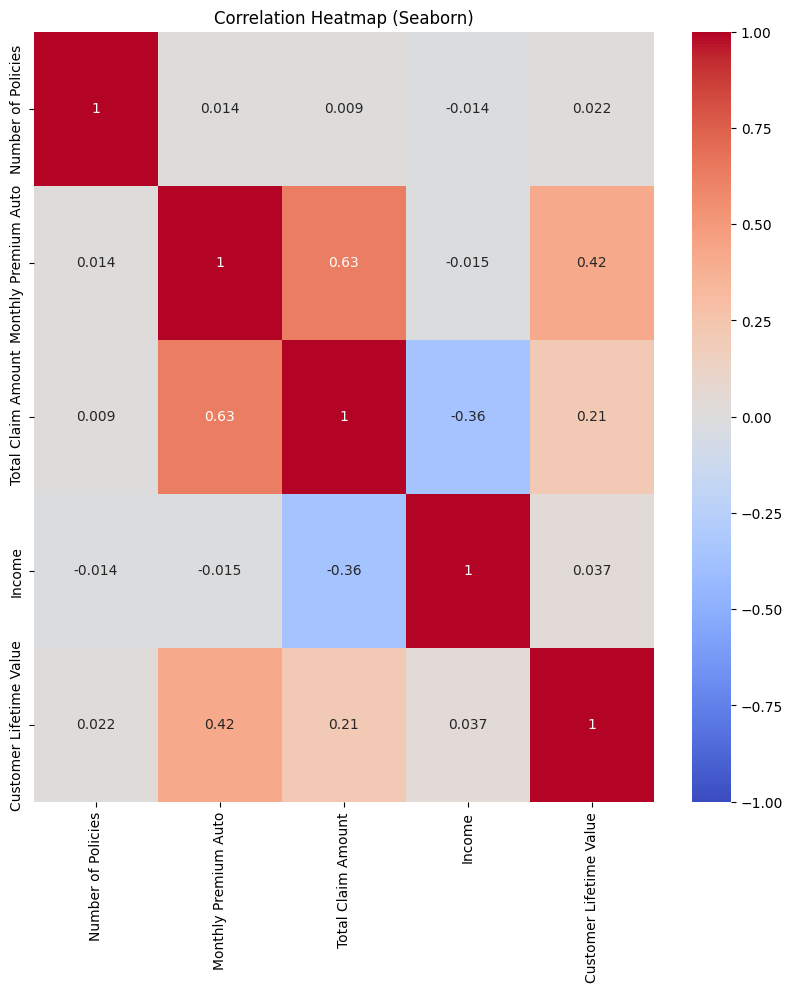

In [ ]:
numeric = data.select_dtypes(include='number')
plt.figure(figsize=(10, 10))
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Seaborn)')
plt.show()

Nilai korelasi tertinggi berada di Monthly Premium Auto dengan Total Claim Amount sebesar 0.63.

Untuk hubungan dengan CLV, Monthly Premium Auto dan Total Claim Amount memiliki nilai korelasi tertinggi dibandingkan hubungan kolom lain dengan CLV. Masing-masing nilai sebesar 0.42 dan 0.21.

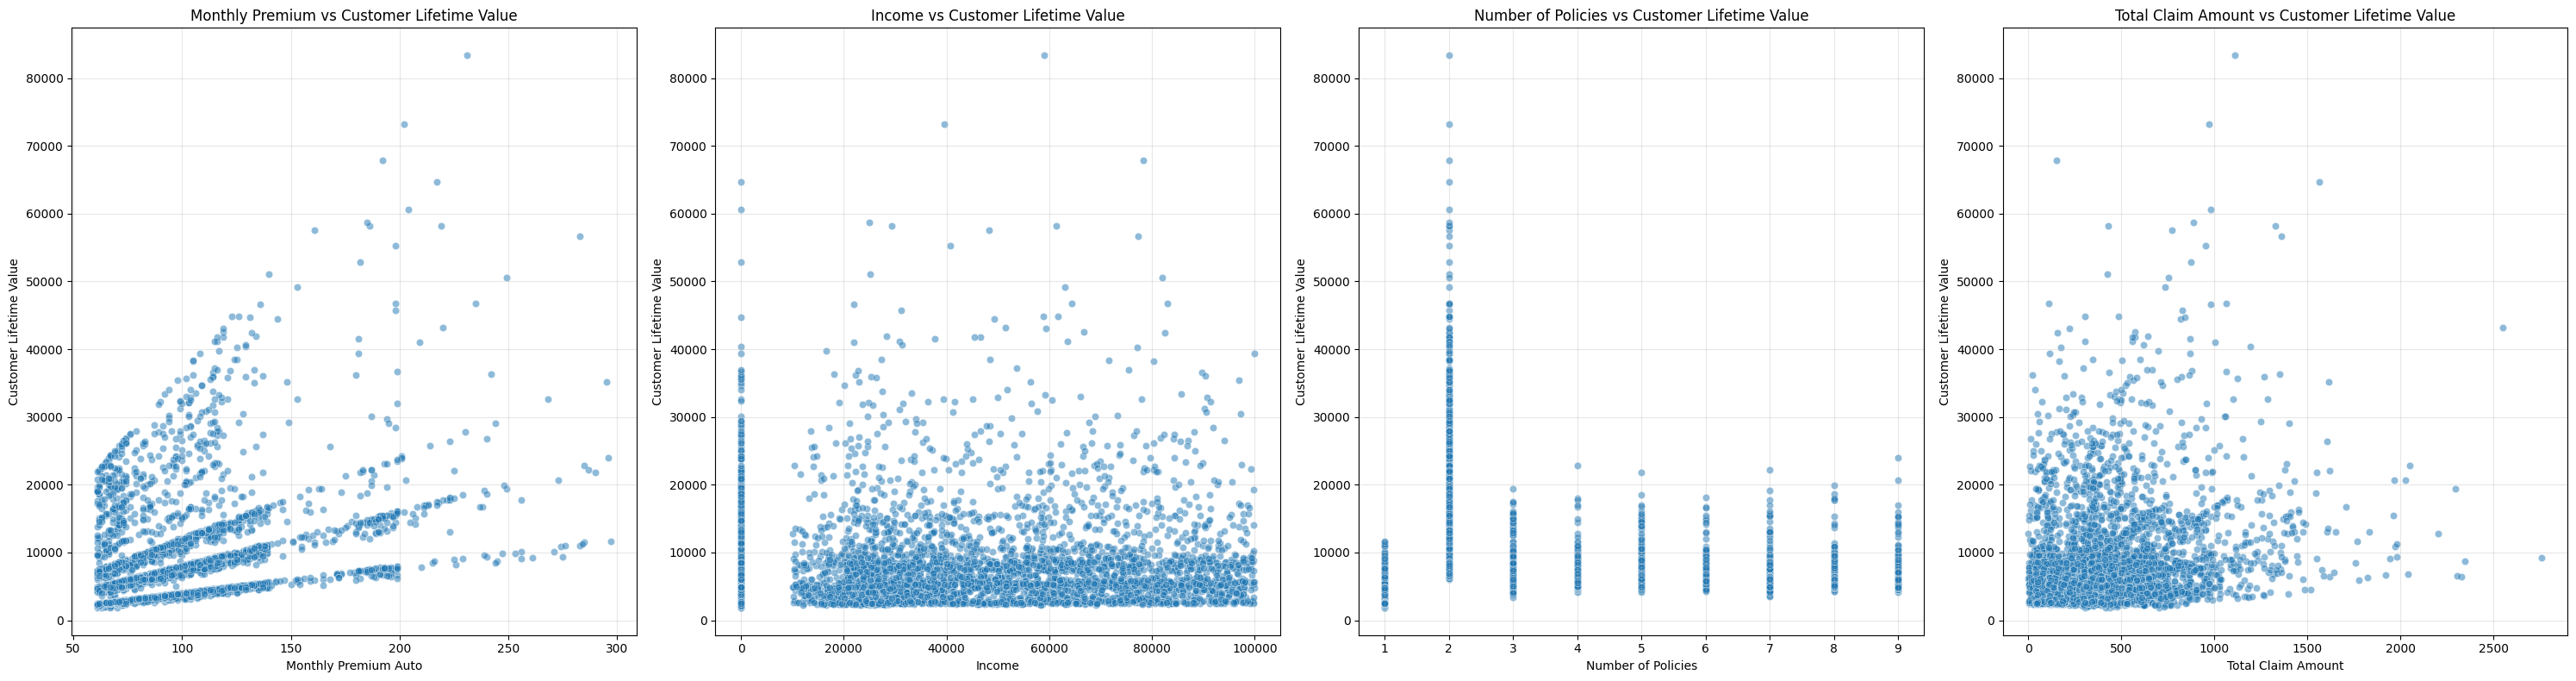

In [ ]:
plt.figure(figsize=(30, 8))

# Plot 1
plt.subplot(1, 4, 1)
sns.scatterplot(data=data, x='Monthly Premium Auto', y='Customer Lifetime Value', alpha=0.5)
plt.title('Monthly Premium vs Customer Lifetime Value')
plt.grid(True, alpha=0.3)

# Plot 2
plt.subplot(1, 4, 2)
sns.scatterplot(data=data, x='Income', y='Customer Lifetime Value', alpha=0.5)
plt.title('Income vs Customer Lifetime Value')
plt.grid(True, alpha=0.3)

# Plot 3
plt.subplot(1, 4, 3)
sns.scatterplot(data=data, x='Number of Policies', y='Customer Lifetime Value', alpha=0.5)
plt.title('Number of Policies vs Customer Lifetime Value')
plt.grid(True, alpha=0.3)

# Plot 4
plt.subplot(1, 4, 4)
sns.scatterplot(data=data, x='Total Claim Amount', y='Customer Lifetime Value', alpha=0.5)
plt.title('Total Claim Amount vs Customer Lifetime Value')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###**Uji Multikolinearitas**

Uji multikolinearitas dilakukan untuk mengetahui setiap variabel dalam dataset tidak terlalu tumpang tindih dengan variabel independen lainnya yang dapat menyebabkan hasil pengujian kurang valid.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrix
import statsmodels.api as sm
import pandas as pd

In [ ]:
X = data[['Number of Policies', 'Monthly Premium Auto', 'Total Claim Amount', 'Income']]

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Hitung VIF untuk setiap variabel
vif_df = pd.DataFrame()
vif_df['Variable'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)

               Variable        VIF
0                 const  11.569816
1    Number of Policies   1.000430
2  Monthly Premium Auto   1.796275
3    Total Claim Amount   2.064623
4                Income   1.255573


Nilai VIF Monthly Premium Auto dan Total Claim Amount < 5, artinya:
*   Variabel numerik dari databse tidak saling berkolerasi kuat
*   Tidak terjadi multikolinearitas



###**Kolom Kategorik**

In [ ]:
#Data kategorik
data.describe(include='object')

,Vehicle Class,Coverage,Renew Offer Type,EmploymentStatus,Marital Status,Education
count,5051,5051,5051,5051,5051,5051
unique,6,3,4,5,3,5
top,Four-Door Car,Basic,Offer1,Employed,Married,Bachelor
freq,2565,3100,2019,3187,2986,1529


###**Nilai Unik Kategorik**

In [ ]:
kategorik = data.select_dtypes(include = 'object')
print(kategorik.nunique())

Vehicle Class       6
Coverage            3
Renew Offer Type    4
EmploymentStatus    5
Marital Status      3
Education           5
dtype: int64


####**Cek Nilai Unik di Kolom Kategorik**

In [ ]:
for col in kategorik:
    print(f'''Value count kolom {col}:''')
    print(kategorik[col].value_counts())
    print()

Value count kolom Vehicle Class:
Vehicle Class
Four-Door Car    2565
Two-Door Car     1059
SUV               963
Sports Car        262
Luxury SUV        101
Luxury Car        101
Name: count, dtype: int64

Value count kolom Coverage:
Coverage
Basic       3100
Extended    1517
Premium      434
Name: count, dtype: int64

Value count kolom Renew Offer Type:
Renew Offer Type
Offer1    2019
Offer2    1505
Offer3     885
Offer4     642
Name: count, dtype: int64

Value count kolom EmploymentStatus:
EmploymentStatus
Employed         3187
Unemployed       1332
Medical Leave     232
Disabled          216
Retired            84
Name: count, dtype: int64

Value count kolom Marital Status:
Marital Status
Married     2986
Single      1374
Divorced     691
Name: count, dtype: int64

Value count kolom Education:
Education
Bachelor                1529
College                 1474
High School or Below    1450
Master                   397
Doctor                   201
Name: count, dtype: int64



Dari kolom kategorik di atas, dapat disimpulkan bahwa:

1. **Vehincle Class**
*   Jenis **Four Door Class** memiliki jumlah terbanyak, sebesar 2565 buah

2. **Coverage**
*   Kolom coverage tertinggi nilainya dipegang oleh jenis **Basic** sebesar 3100.

3. **Renew Offer Type**
*   **Offer 1** menjadi pilihan yang banyak diminati sebesar 2019.

4. **Employment Status**
*   Kategori **Employmed** menjadi kategori terbanyak yang tercatat sebanyak 3187.

5. **Marital Status**
*   Pelanggan **Married** menjadi kategori terbanyak sebesar 2986.

6. **Education**
*   Kebanyakan pelanggan berada dalam tingkat **Bachelor** sebanyak 1529.














##**Kesimpulan Data Understanding**

1. Database memiliki 5669 baris dan 11 kolom
2. Data yang terduplikat sebanyak 618 telah dihilangkan
3. Tidak ada missing value
4. Outlier masih dapat diterima

#**Alasan Pemakaian Machine Learning**

Sebelum dilakukan pengujian dengan Machine Learning, dapat diutarakan apa saja alasan dari penggunaan Machine Learning ini.

1. Efisiensi waktu, dataset terdiri dari > 5000 data sehingga akan memakan waktu lama untuk permodelan sederhana.
2. Kompleksitas fitur lebih terbaca dengan Machine Learning.
3. Pengambilan keputusan bisnis cepat berdasarkan data yang tersedia.
4. Mengetahui berapa besar ketepatan prediksi nilai Customer Lifetime Value berdasarkan nilai aktual dari dataset.

#**Data Splitting**

Untuk menghindari bias dan data leakage, dapat dilakukan pemisahan antara data latih dan data uji.

In [ ]:
X = data.drop(columns = 'Customer Lifetime Value')
Y = data['Customer Lifetime Value']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size = 0.2,
    random_state = 42,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4040, 10), (1011, 10), (4040,), (1011,))

#**Data Preparation**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: ColumnTransformer
preprocessor = ColumnTransformer([
    ('robust', RobustScaler(), ['Total Claim Amount', 'Monthly Premium Auto']),
    ('minmax', MinMaxScaler(), ['Number of Policies']),
    ('standard', StandardScaler(), ['Income']),
    ('onehot', OneHotEncoder(drop='first',  handle_unknown='ignore'), [  # Penambahan handle_ignore dikarenakan dalam running setelahnya terdapat code yang tidak bisa membaca onehot, untuk menghindari error digunakan penambahan ignore tersebut
        'Vehicle Class', 'Coverage', 'Renew Offer Type',
        'EmploymentStatus', 'Marital Status', 'Education'
    ])
], remainder='passthrough')

# Step 2: Pipeline dengan model regresi
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 4: Fit
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['Total Claim Amount',
                                                   'Monthly Premium Auto']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Number of Policies']),
                                                 ('standard', StandardScaler(),
                                                  ['Income']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'Renew Offer Type',
                                                   'EmploymentStatus',
                                                   'Marital Status',
                                                   'Education'])])),
                ('model', LinearRegression())])

Penggunaan **Scaler dan Encoding**:

1. Robust Scaler ('Total Claim Amount', 'Monthly Premium Auto') dikarenakan kolom memiliki nilai outlier yang tinggi.
2. MinMax Scaler ('Number of Policies') dikarenakan kolom memiliki nilai outlier terbilang sedikit dibandingkan kolom pada Robust Scaler.
3. Standard Scaler ('Income') dikarenakan kolom tidak memiliki outlier.
4. Encoding - OneHot Encoding (kolom kategorik)

In [ ]:
y_pred = pipeline.predict(X_test)

Dalam kasus ini, dataset termasuk ke dalam regresi, sehingga untuk algoritma model dan evaluasi matrix yang digunakan selanjutnya menyesuaikan dengan regresi.

#**Modelling**

Algoritma yang digunakan untuk regresi (Customer Lifetime Value) antara lain:
- **Linear Regression** (efisien untuk mendeteksi pola linear dalam data)
- **Random Forest** (memiliki resistensi tinggi terhadap struktur yang unik)
- **Elastic Net** (kombinasi lasso dan ridge, memiliki kapabilitas dalam meng-handle model yang kompleks dengan korelasi yang tinggi)
- **Stacking** (meningkatkan akurasi prediksi)
- **XGBoost** (banyak digunakan karena cepat, akurat, dan efisiensi tinggi untuk permodelan)
- **Lasso**
- **Ridge**
(Pengujian Lasso dan Ridge untuk melihat apakah lebih baik dilakukan independen atau digabungkan)

Referensi = (Haddadi dan Hamidi, 2025)

===========================================================================================

Matrix Evaluasi yang digunakan:
- **MAE** (mudah diinterpretasikan)
- **MAPE** (mudah dimengerti bisnis, selain MAE)
- **RMSE** (mengurangi pengaruh outlier skala besar)
- **R^2** (skor relatif terhadap model baseline (mean))

Dalam jurnal yang ditulis oleh Bax pada tahun 2023, beberapa peneliti menjabarkan untuk memprediksi CLV, terdapat 4 evaluasi matrix populer yaitu R2, RMSE, MAPE, dan MAE. Akan tetapi, Chai dan Draxler (2014) serta Willmott dan Matsuura (2005) sangat merekomendasikan penggunaan MAE dibandingkan evaluasi matriks yang lainnya karena penggunaannya sederhana dan mudah diinterpretasikan. Selain itu, MAPE memiliki bias pada forecast yang besar sehingga kurang cocok digunakan. Oleh karena itu, R2, RMSE, MAE, dan MAPE adalah evaluasi matrix yang saling berhubungan, tetapi dalam konteks ini ingin **fokus ke MAE** untuk melihat seberapa besar eror nilai prediksi terhadap nilai aslinya.

### **Rule Based Model**

Model pertama, kita akan mencoba permodelan sederhana untuk mengetahui nilai MAE, apakah data telah terprediksi dengan baik atau harus menggunakan Machine Learning (sebagai bukti untuk penggunaan Machine Learning)

In [ ]:
from sklearn.metrics import mean_absolute_error

# Rule-based regresi CLV
def rule_based_clv(df):
    # Estimasi CLV berdasarkan fitur yang relevan
    clv = (
        df['Monthly Premium Auto'] * 12 * 0.4 + # dikali tahun dan bobot (nilai bebas)
        df['Total Claim Amount'] * 0.3 + # nilai bobot (nilai bebas)
        df['Number of Policies'] * 100 + # nilai bobot agar nilai sebanding dengan CLV (nilai bebas)
        df['Income'] * 0.1
    )
    return clv

# Prediksi CLV
y_pred_train_clv = X_train.apply(rule_based_clv, axis=1)
y_pred_test_clv = X_test.apply(rule_based_clv, axis=1)

# Hitung MAE
mae_train = mean_absolute_error(y_train, y_pred_train_clv)
mae_test = mean_absolute_error(y_test, y_pred_test_clv)

# Buat dataframe hasil
df0 = pd.DataFrame({
    'model': ['Rule-Based CLV'],
    'Train MAE Mean': [mae_train],
    'Test MAE Mean': [mae_test]
})

print(df0)


            model  Train MAE Mean  Test MAE Mean
0  Rule-Based CLV     5228.386636    4979.596687


Dari model sederhana tanpa Machine Learning, nilai prediksi CLV dalam fokus nilai MAE, menunjukkan bahwa errornya tinggi, hal ini dapat menjadi alasan aktual penggunaan Machine Learning yang diharapkan dapat memodelkan data lebih baik.

###**Experiment 1: Based Model**

Eksperimen 1 ini menggunakan model yang telah dideklarasikan sebelumnya yaitu 7 model, lalu akan dipilih 2 model terbaik untuk dilakukan cross validasi dan digunakan dalam tahap selanjutnya.

In [ ]:
# Base models
lr = LinearRegression()
en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)
lasso = Lasso(alpha=0.1, random_state=0)
ridge = Ridge(alpha=1.0, random_state=0)

# Stacking
base_models = [
    ('lr', lr),
    ('lasso', lasso),
    ('ridge', ridge),
    ('en', en)
]
meta_model = LinearRegression()
stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Bagging
rf = RandomForestRegressor(random_state=0)

# Boosting
xgb = XGBRegressor(random_state=0)


In [ ]:
#Membuat pengolahan nilai evaluation matrix

train_score_mean_list = []
train_score_std_list = []
rmse_mean_list = []
rmse_std_list = []
mae_mean_list = []
mae_std_list = []
mape_mean_list = []
mape_std_list = []

scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

for i in [lr, lasso, ridge, en, stacking, rf, xgb]:
    model = Pipeline([
        ('transformer', preprocessor),
        ('model', i)
    ])

    # Train model
    cv_score = cross_validate(model, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

    # R² train
    train_score_mean_list.append(cv_score['train_r2'].mean())
    train_score_std_list.append(cv_score['train_r2'].std())

    # RMSE train
    rmse_mean_list.append(abs(cv_score['train_rmse']).mean())
    rmse_std_list.append(abs(cv_score['train_rmse']).std())

    # MAE train
    mae_mean_list.append(abs(cv_score['train_mae']).mean())
    mae_std_list.append(abs(cv_score['train_mae']).std())

    # MAPE train
    mape_mean_list.append(abs(cv_score['train_mape']).mean())
    mape_std_list.append(abs(cv_score['train_mape']).std())

In [ ]:
# List nama model
model_names = [
    'Linear Regression',
    'Elastic Net',
    'Lasso',
    'Ridge',
    'Stacking',
    'Random Forest',
    'XGBoost'
]

# Dataframe
df1 = pd.DataFrame({
    'Model': model_names,
    'Train R2 Mean': train_score_mean_list,
    'Train R2 Std': train_score_std_list,
    'Train RMSE Mean': rmse_mean_list,
    'Train RMSE Std': rmse_std_list,
    'Train MAE Mean': mae_mean_list,
    'Train MAE Std': mae_std_list,
    'Train MAPE Mean': mape_mean_list,
    'Train MAPE Std': mape_std_list

}).round(4)

df1.reset_index(drop=True, inplace=True)
df1


,Model,Train R2 Mean,Train R2 Std,Train RMSE Mean,Train RMSE Std,Train MAE Mean,Train MAE Std,Train MAPE Mean,Train MAPE Std
0,Linear Regression,0.1929,0.0091,6294.7930,68.9819,3913.5561,33.5725,0.5914,0.0043
1,Elastic Net,0.1929,0.0091,6294.7951,68.9812,3913.4168,33.5836,0.5914,0.0043
2,Lasso,0.1929,0.0091,6294.8410,69.0120,3913.0134,33.4604,0.5914,0.0043
3,Ridge,0.1887,0.0085,6311.1381,71.0041,3919.2873,36.6581,0.6007,0.0044
4,Stacking,0.1905,0.0095,6304.2290,68.8958,3909.6781,31.0998,0.5942,0.0040
5,Random Forest,0.9501,0.0010,1564.7283,35.6019,639.3617,10.6320,0.0466,0.0009
6,XGBoost,0.9619,0.0018,1367.2002,27.8742,725.4353,14.8854,0.0890,0.0026


Nilai MAE paling kecil di Random Forest, tetapi untuk beberapa evaluasi matrix lainnya berada di XGBoost, sehingga kedua model tersebut akan divalidasi melalui cross validation.

#### **Cross Validation 2 Model Terbaik**

(Cross Validation) Melihat nilai per fold, untuk memastikan tidak terdapat nilai per fold yang jauh antara satu sama lain yang dapat menyebabkan overfitting atau underfitting

In [ ]:
import pandas as pd
import numpy as np

# Nama dua model yang terbaik dari hasil test
model_names = ['Random Forest','XGBoost']

# List model
models = [rf, xgb]

# Simpan hasil per fold
all_results = []

for name, i in zip(model_names, models):
    model = Pipeline([
        ('transformer', preprocessor),
        ('model', i)
    ])

    cv_score = cross_validate(
        model,
        X_train,
        y_train,
        cv=5,
        scoring=scoring,
        return_train_score=True
    )

    # Simpan hasil per fold
    for fold in range(len(cv_score['train_r2'])):
        all_results.append({
            'Model': name,
            'Fold': fold + 1,
            'Train R²': cv_score['train_r2'][fold],
            'Train RMSE': abs(cv_score['train_rmse'][fold]),
            'Train MAE': abs(cv_score['train_mae'][fold]),
            'Train MAPE': abs(cv_score['train_mape'][fold]),
        })

    # Hitung mean dan std
    mean_row = {
        'Model': name,
        'Fold': 'Mean',
        'Train R²': np.mean(cv_score['train_r2']),
        'Train RMSE': np.mean(np.abs(cv_score['train_rmse'])),
        'Train MAE': np.mean(np.abs(cv_score['train_mae'])),
        'Train MAPE': np.mean(np.abs(cv_score['train_mape'])),
    }
    std_row = {
        'Model': name,
        'Fold': 'Std',
        'Train R²': np.std(cv_score['train_r2']),
        'Train RMSE': np.std(np.abs(cv_score['train_rmse'])),
        'Train MAE': np.std(np.abs(cv_score['train_mae'])),
        'Train MAPE': np.std(np.abs(cv_score['train_mape'])),
    }

    all_results.append(mean_row)
    all_results.append(std_row)

# Gabungkan semua jadi DataFrame
df_folds = pd.DataFrame(all_results)

# Tampilkan hasil
for name in model_names:
    print(f"\n=== {name} ===")
    display(df_folds[df_folds['Model'] == name])



=== Random Forest ===


,Model,Fold,Train R²,Train RMSE,Train MAE,Train MAPE
0,Random Forest,1,0.950391,1561.422457,625.390584,0.045039
1,Random Forest,2,0.951890,1510.789891,629.063552,0.046581
2,Random Forest,3,0.948921,1611.393541,654.055136,0.046833
3,Random Forest,4,0.950109,1594.344865,645.201791,0.046656
4,Random Forest,5,0.949405,1545.690773,643.097194,0.047721
5,Random Forest,Mean,0.950143,1564.728305,639.361651,0.046566
6,Random Forest,Std,0.001015,35.601948,10.632042,0.000866



=== XGBoost ===


,Model,Fold,Train R²,Train RMSE,Train MAE,Train MAPE
7,XGBoost,1,0.962365,1359.989008,732.364942,0.090763
8,XGBoost,2,0.962695,1330.359190,708.589885,0.088723
9,XGBoost,3,0.964267,1347.772693,713.977456,0.085858
10,XGBoost,4,0.961234,1405.395594,750.551183,0.092886
11,XGBoost,5,0.958938,1392.484315,721.692987,0.086667
12,XGBoost,Mean,0.961900,1367.200160,725.435291,0.088980
13,XGBoost,Std,0.001770,27.874232,14.885447,0.002592


Dari cross validation didapatkan bahwa ketika kita memfokuskan ke dalam nilai MAE, Random Forest memiliki nilai lebih kecil dibandingkan XGBoost, begitu pula untuk standar deviasinya, Random Forest cenderung lebih kecil dibandingkan XGBoost.

###**Experiment 2: Hapus Outlier**

Selanjutnya adalah eksperimen dengan mengahpus outlier. Pada eksperimen ini diharapkan untuk nilai dari cross validationnya lebih kecil dibandingkan eskperimen sebelumnya karena outlier sebagian besar telah terhapus.

In [ ]:
def hapus_outliers_seluruhnya(data, target):
    kolom_numerik = data.drop(columns=target).select_dtypes(include='number').columns
    index_outliers = set()

    for kolom in kolom_numerik:
        q1 = data[kolom].quantile(0.25)
        q3 = data[kolom].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # cari baris yang outlier di kolom ini
        outlier_idx = data[(data[kolom] < lower_bound) | (data[kolom] > upper_bound)].index
        index_outliers.update(outlier_idx)

    # hapus semua baris yang merupakan outlier di kolom mana pun
    return data.drop(index_outliers)

In [ ]:
# Gabungkan X_train dan y_train dulu
train_set = X_train.copy()
train_set['Customer Lifetime Value'] = y_train

# Hapus outliers hanya dari training set
train_set_no_outliers = hapus_outliers_seluruhnya(train_set, 'Customer Lifetime Value')

Cek Outlier dalam Kolom Numerik

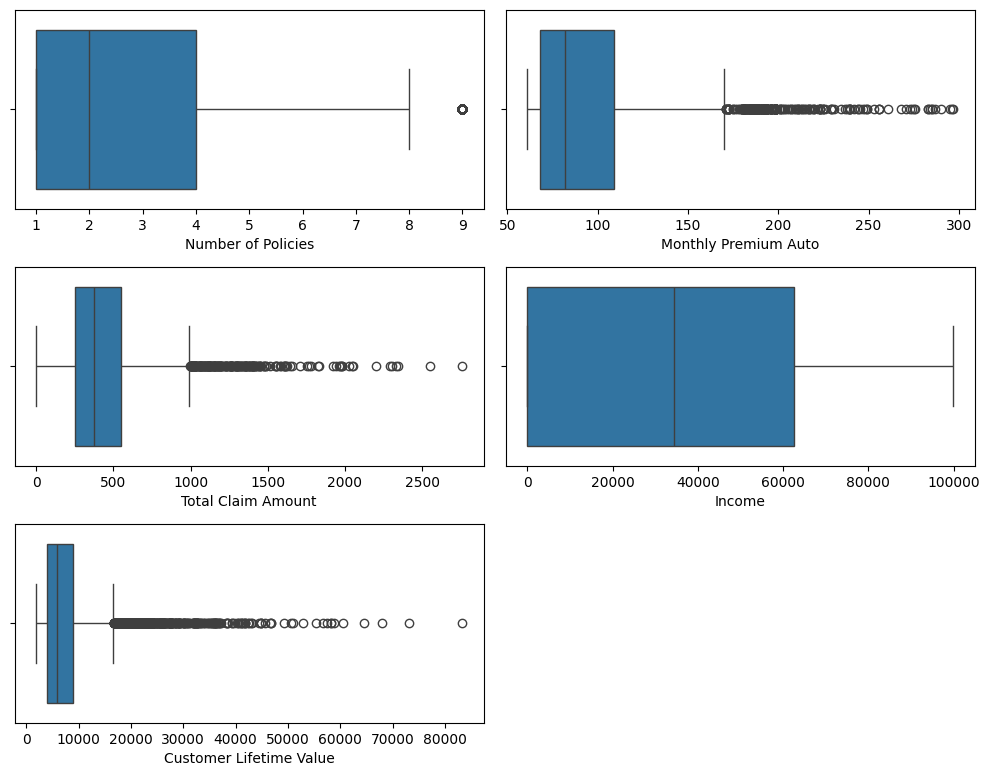

In [ ]:
numerik = data.select_dtypes(include = 'number')

plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns: # numerik.columns = nama-nama kolom dalam list
    plt.subplot(4,2,posisi)
    sns.boxplot(x = data[setiap_kolom])
    posisi = posisi + 1

    plt.tight_layout()

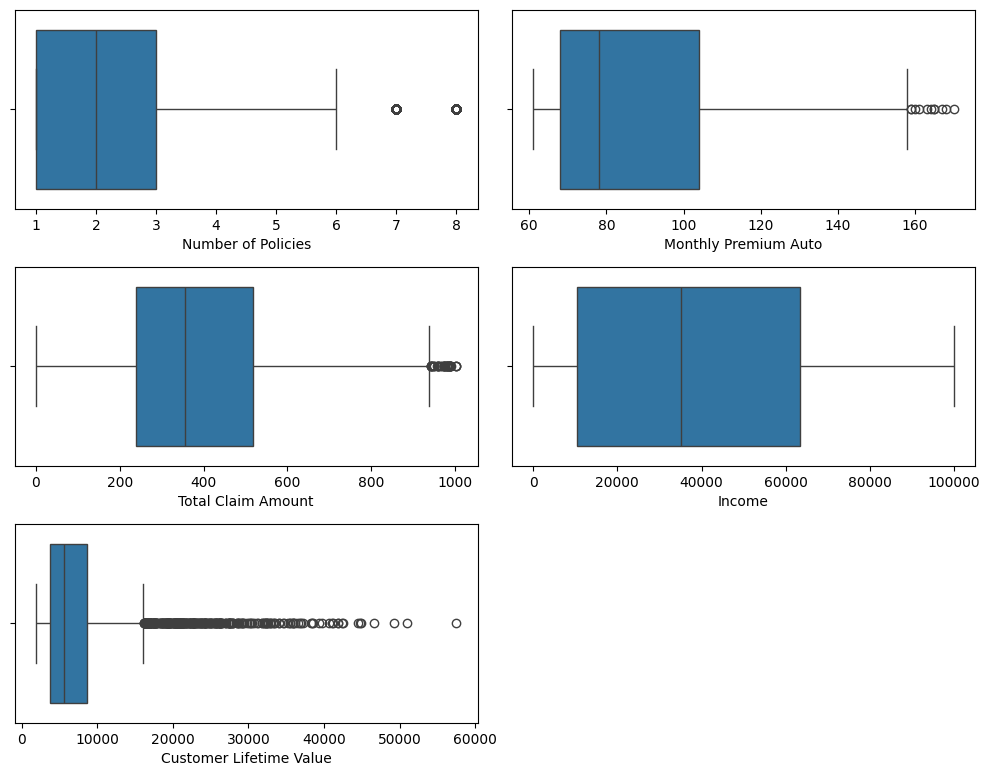

In [ ]:
# Tampilkan boxplot untuk verifikasi
import matplotlib.pyplot as plt
import seaborn as sns

numerik = train_set_no_outliers.select_dtypes(include='number')

plt.figure(figsize=(10,10))
posisi = 1
for kolom in numerik.columns:
    plt.subplot(4, 2, posisi)
    sns.boxplot(x = train_set_no_outliers[kolom])
    posisi += 1
    plt.tight_layout()

In [ ]:
# Pisahkan kembali
X_train_no_outliers = train_set_no_outliers.drop(columns='Customer Lifetime Value')
y_train_no_outliers = train_set_no_outliers['Customer Lifetime Value']

X_train_no_outliers, X_test_no_outliers, y_train_no_outliers, y_test_no_outliers = train_test_split(
    X_train_no_outliers,
    y_train_no_outliers,
    test_size = 0.2,
    random_state = 42,
)

In [ ]:
X_train_no_outliers.shape, X_test_no_outliers.shape, y_train_no_outliers.shape, y_test_no_outliers.shape

((2870, 10), (718, 10), (2870,), (718,))

In [ ]:
#Membuat pengolahan nilai evaluation matrix

train_score_mean_list = []
train_score_std_list = []
rmse_mean_list = []
rmse_std_list = []
mae_mean_list = []
mae_std_list = []
mape_mean_list = []
mape_std_list = []

scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

for i in [rf, xgb]:
    model = Pipeline([
        ('transformer', preprocessor),
        ('model', i)
    ])

    # Train model
    score = cross_validate(model, X_train_no_outliers, y_train_no_outliers, cv=5, scoring=scoring, return_train_score=True)

    # R² train
    train_score_mean_list.append(score['train_r2'].mean())
    train_score_std_list.append(score['train_r2'].std())

    # RMSE train
    rmse_mean_list.append(abs(score['train_rmse']).mean())
    rmse_std_list.append(abs(score['train_rmse']).std())

    # MAE train
    mae_mean_list.append(abs(score['train_mae']).mean())
    mae_std_list.append(abs(score['train_mae']).std())

    # MAPE train
    mape_mean_list.append(abs(score['train_mape']).mean())
    mape_std_list.append(abs(score['train_mape']).std())

Model yang dijalankan adalah 2 model terbaik dari Experiment 1 yaitu Random Forest dan XGBoost.

In [ ]:
# Dua model terbaik dari eksperimen 1
model_names = [
    'Random Forest',
    'XGBoost'
]

# Buat dataframe hasil evaluasi
df2 = pd.DataFrame({
    'Model': model_names,
    'Train R2 Mean': train_score_mean_list,
    'Train R2 Std': train_score_std_list,
    'Train RMSE Mean': rmse_mean_list,
    'Train RMSE Std': rmse_std_list,
    'Train MAE Mean': mae_mean_list,
    'Train MAE Std': mae_std_list,
    'Train MAPE Mean': mape_mean_list,
    'Train MAPE Std': mape_std_list

}).round(4)

df2.reset_index(drop=True, inplace=True)
df2

,Model,Train R2 Mean,Train R2 Std,Train RMSE Mean,Train RMSE Std,Train MAE Mean,Train MAE Std,Train MAPE Mean,Train MAPE Std
0,Random Forest,0.9461,0.0008,1462.1781,26.2457,627.7563,13.3035,0.0486,0.0008
1,XGBoost,0.9723,0.0031,1046.2401,63.0525,535.7272,15.0400,0.0699,0.0023


Dilihat dari Experiment 2 dan fokus dalam nilai MAE, XGBoost tanpa Outlier memiliki nlai MAE lebih kecil dibandingkan Random Forest. Tetapi untuk cross validasinya dapat kita cek berikut ini.

#### **Cross Validation 2 Model Terbaik**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import xgboost as xgb_module

xgb = xgb_module.XGBRegressor(random_state=0)

# Model dan nama model
model_names = ['Random Forest', 'XGBoost']
models = [rf, xgb]  # pastikan rf dan xgb sudah instansi model

# List untuk menyimpan hasil
all_results2 = []

for name, model_instance in zip(model_names, models):
    pipeline = Pipeline([
        ('preprocessing', preprocessor),
        ('model', model_instance)
    ])

    cv_score = cross_validate(
        pipeline,
        X_train_no_outliers,
        y_train_no_outliers,
        cv=5,
        scoring=scoring,
        return_train_score=True
    )

    # Simpan hasil per fold ke all_results2, bukan all_results
    for fold in range(len(cv_score['train_r2'])):
        all_results2.append({
            'Model': name,
            'Fold': fold + 1,
            'Train R2': cv_score['train_r2'][fold],
            'Train RMSE': abs(cv_score['train_rmse'][fold]),
            'Train MAE': abs(cv_score['train_mae'][fold]),
            'Train MAPE': abs(cv_score['train_mape'][fold]),
        })

    # Hitung mean dan std per model
    mean_row = {
        'Model': name,
        'Fold': 'Mean',
        'Train R2': np.mean(cv_score['train_r2']),
        'Train RMSE': np.mean(np.abs(cv_score['train_rmse'])),
        'Train MAE': np.mean(np.abs(cv_score['train_mae'])),
        'Train MAPE': np.mean(np.abs(cv_score['train_mape'])),
    }
    std_row = {
        'Model': name,
        'Fold': 'Std',
        'Train R2': np.std(cv_score['train_r2']),
        'Train RMSE': np.std(np.abs(cv_score['train_rmse'])),
        'Train MAE': np.std(np.abs(cv_score['train_mae'])),
        'Train MAPE': np.std(np.abs(cv_score['train_mape'])),
    }

    all_results2.append(mean_row)
    all_results2.append(std_row)

# Gabungkan jadi DataFrame
df_folds2 = pd.DataFrame(all_results2)

# Tampilkan hasil untuk tiap model
for name in model_names:
    print(f"\n=== {name} ===")
    display(df_folds2[df_folds2['Model'] == name].reset_index(drop=True))



=== Random Forest ===


,Model,Fold,Train R2,Train RMSE,Train MAE,Train MAPE
0,Random Forest,1,0.946847,1423.741400,604.101352,0.047289
1,Random Forest,2,0.946471,1488.256848,644.816886,0.049700
2,Random Forest,3,0.944579,1494.731366,632.033342,0.048488
3,Random Forest,4,0.946551,1448.685391,631.495126,0.048984
4,Random Forest,5,0.945839,1455.475481,626.335005,0.048657
5,Random Forest,Mean,0.946058,1462.178097,627.756342,0.048624
6,Random Forest,Std,0.000809,26.245664,13.303474,0.000786



=== XGBoost ===


,Model,Fold,Train R2,Train RMSE,Train MAE,Train MAPE
0,XGBoost,1,0.968728,1092.063494,541.509832,0.070195
1,XGBoost,2,0.968487,1141.913209,561.808679,0.072644
2,XGBoost,3,0.974136,1021.114878,520.154527,0.066626
3,XGBoost,4,0.976366,963.330217,532.170504,0.072015
4,XGBoost,5,0.973776,1012.778833,522.992483,0.068116
5,XGBoost,Mean,0.972298,1046.240126,535.727205,0.069919
6,XGBoost,Std,0.003143,63.052532,15.040037,0.002280


Dari cross validation, XGBoost tanpa outlier memiliki nilai MAE lebih baik dibandingkan nilai Random Forest tanpa outlier.

### **Hasil Eksperimen**

In [ ]:
df1['eksperimen'] = 'Based Model'
df2['eksperimen'] = 'Without Outliers'


# penggabungan semua df score
df_gab = pd.concat([df1, df2], axis = 0)
df_gab = df_gab.set_index(['eksperimen','Model'])

# highlight ke score terbaik
df_gab.style.highlight_max(subset = ['Train R2 Mean'],color = 'lightgreen', axis = 0).highlight_min(subset = ['Train RMSE Mean', 'Train MAE Mean', 'Train MAPE Mean','Train R2 Std', 'Train RMSE Std', 'Train MAE Std', 'Train MAPE Std'],color = 'lightgreen', axis = 0)

Melihat nilai MAE, karena ingin melihat angka dalam satuan asli dan mudah dipahami dalam dunia bisnis. **Model terbaik XGBoost dari Experiment 2 (Tanpa Outlier)**

# **Hyperparameter Tuning**

Parameter yang digunakan antara lain:
1. model_n_estimator, digunakan untuk mengendalikan learning rate.
2. model_min_child_weight,mendefinisikan jumlah minimum bobot instans yang diperlukan pada node.
3. model_max_depth, seberapa dalam pohon boosting dapat digunakan.
4. model_subsample, proporsi data training.
5. model_colsample_bytree, proporsi fitur yang digunakan tiap pohon
6. model_n_learning_rate, seberapa banyak step per size, baiknya nilainya kecil dengan jumlah pohon yang lebih besar (dikendalikan oleh parameter n_estimators) untuk mencapai kinerja yang lebih baik.

6 parameter di atas yang disebutkan akan digunakan karena keenam parameter tersebut merupakan parameter XGBoost yang penting, akan tetapi dapat juga ditambahkan. Penulis tidak menggunakan parameter tambahan untuk efisiensi waktu (karena dalam grid search dengan mencoba semua kombinasi dapat memakan waktu yang lama)

Sumber : https://xgboosting.com/most-important-xgboost-hyperparameters-to-tune/

#### **Grid Search**

Pertama akan dicoba hyperparameter tuning dengan grid search dengan mencoba semua kombinasi dalam parameter.

In [ ]:
# Metode Grid Search

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# # Parameter yang akan dicoba
param_grid = {
    'model__n_estimators': [100, 200, 300], #jumlah pohon boosting yang digunakan, umumnya 100-300, kalau lebih besar ditakutkan akan overfitting
    'model__learning_rate': [0.01, 0.1, 0.2], #step size per pohon, nilai yang kecil diharapkan dapat mengolah data dengan baik
    'model__max_depth': [3, 4, 5], #kedalaman, umumnya dimulai di angka 3
    'model__subsample': [0.4, 0.6, 0.8], #proporsi data training, diharapkan mengurangi overfitting
    'model__colsample_bytree': [0.4, 0.6, 0.8], #proporsi fitur yang digunakan tiap pohon, membantu mencegah overfitting
    'model__min_child_weight': [3, 5, 7] #nilai tidak terlalu besar, cegah overfitting
}
xgb_model = xgb.XGBRegressor(random_state=0)

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

 # Grid Search
grid_search = GridSearchCV(
     estimator=pipeline,
     param_grid=param_grid,
     #scoring=scoring,
     scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
     cv=5,
     n_jobs=-1,
     refit='neg_mean_absolute_error' # nilai MAE
 )

# # Fit ke data train+val
grid_search.fit(X_train_no_outliers, y_train_no_outliers)

# # Hasil
best_grid_model = grid_search.best_estimator_
grid_results = pd.DataFrame(grid_search.cv_results_)

best_grid_model, grid_search.best_params_, grid_search.best_score_

(Pipeline(steps=[('preprocessing',
                  ColumnTransformer(remainder='passthrough',
                                    transformers=[('robust', RobustScaler(),
                                                   ['Total Claim Amount',
                                                    'Monthly Premium Auto']),
                                                  ('minmax', MinMaxScaler(),
                                                   ['Number of Policies']),
                                                  ('standard', StandardScaler(),
                                                   ['Income']),
                                                  ('onehot',
                                                   OneHotEncoder(drop='first',
                                                                 handle_unknown='ignore'),
                                                   ['Vehicle Class', 'Coverage',
                                                    'Renew Offer 

In [ ]:
# Melihat hasil terbaik
pd.DataFrame(grid_search.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__colsample_bytree,param_model__learning_rate,param_model__max_depth,param_model__min_child_weight,param_model__n_estimators,param_model__subsample,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
92,0.056140,0.000935,0.014597,0.002451,0.4,0.1,3,5,100,0.8,...,85.634476,30,-0.172215,-0.170947,-0.182119,-0.166818,-0.165323,-0.171484,0.005893,13
342,0.060818,0.002248,0.013303,0.000972,0.6,0.1,3,7,100,0.4,...,89.034054,67,-0.181556,-0.177979,-0.195255,-0.178859,-0.176839,-0.182097,0.006760,68
101,0.057006,0.000853,0.013064,0.001152,0.4,0.1,3,7,100,0.8,...,92.790568,32,-0.172980,-0.169492,-0.184479,-0.164719,-0.163842,-0.171102,0.007464,12
587,0.061808,0.001953,0.012465,0.000567,0.8,0.1,3,7,100,0.8,...,76.796719,28,-0.164499,-0.165188,-0.171479,-0.165047,-0.164635,-0.166169,0.002667,1
82,0.062381,0.008426,0.012603,0.000358,0.4,0.1,3,3,100,0.6,...,83.280679,38,-0.174272,-0.176343,-0.185642,-0.170160,-0.168771,-0.175037,0.005964,42


In [ ]:
# Melihat parameter terbaik dalam XGBoost setelah di tuning
grid_search.best_params_

{'model__colsample_bytree': 0.8,
 'model__learning_rate': 0.01,
 'model__max_depth': 5,
 'model__min_child_weight': 7,
 'model__n_estimators': 300,
 'model__subsample': 0.4}

In [ ]:
# Mendapatkan nilai XGBoost setelah di tuning dengan metode grid search
from sklearn.model_selection import cross_validate

scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

cv_scores = cross_validate(
    best_grid_model,
    X_train_no_outliers, # dari data tanpa outlier
    y_train_no_outliers,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

# Simpan ke DataFrame hasil ringkasan (seperti df2)
summary1 = pd.DataFrame([{
    'Model': 'XGBoost (Tuned)',
    'Train R2 Mean': np.mean(cv_scores['train_r2']),
    'Train R2 Std': np.std(cv_scores['train_r2']),
    'Train RMSE Mean': -np.mean(cv_scores['train_rmse']),
    'Train RMSE Std': np.std(-cv_scores['train_rmse']),
    'Train MAE Mean': -np.mean(cv_scores['train_mae']),
    'Train MAE Std': np.std(-cv_scores['train_mae']),
    'Train MAPE Mean': -np.mean(cv_scores['train_mape']),
    'Train MAPE Std': np.std(-cv_scores['train_mape']),
    'eksperimen': 'Without Outliers + Tuning Grid Search'
}])

display(summary1)


,Model,Train R2 Mean,Train R2 Std,Train RMSE Mean,Train RMSE Std,Train MAE Mean,Train MAE Std,Train MAPE Mean,Train MAPE Std,eksperimen
0,XGBoost (Tuned),0.719692,0.005246,3332.732188,40.159089,1605.368315,28.2817,0.157929,0.001957,Without Outliers + Tuning Grid Search


### **Random Search**

Selanjutnya akan dicoba random search untuk melihat apakah nilai akan lebih baik atau tidak.

In [ ]:
#Random Search
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

xgb_model = xgb.XGBRegressor(random_state=0)

# Pipeline
pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', xgb_model)
])

# Parameter distribusi untuk Randomized Search
param_dist = {
    'model__n_estimators': [100, 200, 300], #jumlah pohon boosting yang digunakan, umumnya 100-300, kalau lebih besar ditakutkan akan overfitting
    'model__learning_rate': [0.01, 0.1, 0.2], #step size per pohon, nilai yang kecil diharapkan dapat mengolah data dengan baik
    'model__max_depth': [3, 4, 5], #kedalaman, umumnya dimulai di angka 3
    'model__subsample': [0.4, 0.6, 0.8], #proporsi data training, diharapkan mengurangi overfitting
    'model__colsample_bytree': [0.4, 0.6, 0.8], #proporsi fitur yang digunakan tiap pohon, membantu mencegah overfitting
    'model__min_child_weight': [3, 5, 7] #nilai tidak terlalu besar, cegah overfitting
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=30,                      # coba 30 kombinasi parameter random
    scoring=['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'],
    refit='neg_mean_absolute_error',  # pilih terbaik berdasarkan MAE
    cv=5,
    verbose=2, # menampilkan satu baris per fold
    n_jobs=-1,
    random_state=42
)

# Fit ke data
random_search.fit(X_train_no_outliers, y_train_no_outliers)

# Output terbaik
print("Best parameters found:")
print(random_search.best_params_)
print(f"Best MAE score: {-random_search.best_score_:.4f}")

# Simpan model terbaik
best_random_model = random_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found:
{'model__subsample': 0.8, 'model__n_estimators': 100, 'model__min_child_weight': 7, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'model__colsample_bytree': 0.8}
Best MAE score: 1829.3347


In [ ]:
# Melihat nilai fit dari random search
pd.DataFrame(random_search.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error','rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__n_estimators,param_model__min_child_weight,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
9,0.057391,0.000941,0.012710,0.000946,0.4,100,7,3,0.1,0.6,...,89.034054,4,-0.181556,-0.177979,-0.195255,-0.178859,-0.176839,-0.182097,0.006760,3
18,0.068430,0.015766,0.012631,0.000546,0.8,100,7,3,0.1,0.8,...,76.796719,1,-0.164499,-0.165188,-0.171479,-0.165047,-0.164635,-0.166169,0.002667,1
10,0.058251,0.001152,0.012475,0.000283,0.8,100,7,3,0.1,0.6,...,94.032979,2,-0.170868,-0.162549,-0.175728,-0.165267,-0.162334,-0.167349,0.005198,2
7,0.058296,0.000915,0.012857,0.000986,0.4,100,3,3,0.1,0.4,...,81.256888,5,-0.191329,-0.187454,-0.190616,-0.184015,-0.182142,-0.187111,0.003591,5
19,0.067759,0.007916,0.014207,0.001020,0.6,100,5,4,0.1,0.4,...,84.929979,3,-0.181390,-0.184602,-0.190253,-0.179460,-0.175161,-0.182173,0.005066,4


In [ ]:
# Melihat nilai XGBoost setelah dituning dengan random search

from sklearn.model_selection import cross_validate

scoring = {
    'r2': 'r2',
    'rmse': 'neg_root_mean_squared_error',
    'mae': 'neg_mean_absolute_error',
    'mape': 'neg_mean_absolute_percentage_error'
}

cv_scores = cross_validate(
    best_random_model,
    X_train_no_outliers, #dari data tanpa outlier
    y_train_no_outliers,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

# Simpan ke DataFrame hasil ringkasan (seperti df2)
summary2 = pd.DataFrame([{
    'Model': 'XGBoost (Tuned)',
    'Train R2 Mean': np.mean(cv_scores['train_r2']),
    'Train R2 Std': np.std(cv_scores['train_r2']),
    'Train RMSE Mean': -np.mean(cv_scores['train_rmse']),
    'Train RMSE Std': np.std(-cv_scores['train_rmse']),
    'Train MAE Mean': -np.mean(cv_scores['train_mae']),
    'Train MAE Std': np.std(-cv_scores['train_mae']),
    'Train MAPE Mean': -np.mean(cv_scores['train_mape']),
    'Train MAPE Std': np.std(-cv_scores['train_mape']),
    'eksperimen': 'Without Outliers + Tuning Random Search'
}])

display(summary2)


,Model,Train R2 Mean,Train R2 Std,Train RMSE Mean,Train RMSE Std,Train MAE Mean,Train MAE Std,Train MAPE Mean,Train MAPE Std,eksperimen
0,XGBoost (Tuned),0.719611,0.005592,3333.025283,25.394601,1663.776551,28.31017,0.151998,0.002679,Without Outliers + Tuning Random Search


###**Perbandingan Hasil Sebelum dan Sesudah di-Tuning**

In [ ]:
# Memanggil df2 untuk XGBoost sebelum tuning
before_tuning = df2[df2['Model'] == 'XGBoost'].copy()
before_tuning['Tuning'] = 'Before Tuning'

# Memanggil XGBoost setelah di Grid Search Tuning
summary1 = summary1.copy()
summary1['Tuning'] = 'Grid Search Tuning'

# Memanggil XGBoost setelah di Random Search Tuning

summary2 = summary2.copy()
summary2['Tuning'] = 'Random Search Tuning'

# Gabungkan semua dataframe
combined_result = pd.concat([before_tuning, summary1, summary2], ignore_index=True)

# Tampilkan hasil
combined_result[['Tuning', 'Train R2 Mean', 'Train R2 Std',
                 'Train RMSE Mean', 'Train RMSE Std',
                 'Train MAE Mean', 'Train MAE Std',
                 'Train MAPE Mean', 'Train MAPE Std']]


,Tuning,Train R2 Mean,Train R2 Std,Train RMSE Mean,Train RMSE Std,Train MAE Mean,Train MAE Std,Train MAPE Mean,Train MAPE Std
0,Before Tuning,0.972300,0.003100,1046.240100,63.052500,535.727200,15.04000,0.069900,0.002300
1,Grid Search Tuning,0.719692,0.005246,3332.732188,40.159089,1605.368315,28.28170,0.157929,0.001957
2,Random Search Tuning,0.719611,0.005592,3333.025283,25.394601,1663.776551,28.31017,0.151998,0.002679


Hasil menunjukkan bahwa XGBoost sebelum dituning menampilkan nilai yang lebih baik dibandingkan setelah dituning.

---

# **Final Model**

Melihat hasil akhir model yang terbaik.

In [ ]:
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor

# Buat model hasil sebelum tuning
best_xgb = XGBRegressor()

# Pipeline lengkap
best_model = Pipeline([
    ('transformer', preprocessor),
    ('model', best_xgb)
])

# Fit ke data
best_model.fit(X_train_no_outliers, y_train_no_outliers)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['Total Claim Amount',
                                                   'Monthly Premium Auto']),
                                                 ('minmax', MinMaxScaler(),
                                                  ['Number of Policies']),
                                                 ('standard', StandardScaler(),
                                                  ['Income']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Vehicle Class', 'Coverage',
                                                   'Renew Offer Type',
                                                   '...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

Evaluasi Prediksi Model Terbaik

In [ ]:
best_model = Pipeline([
    ('transformer', preprocessor),
    ('model', best_xgb)
])

# Fitting
best_model.fit(X_train_no_outliers, y_train_no_outliers)

# Prediksi
y_pred = best_model.predict(X_test_no_outliers)

# Evaluate the model
mae = mean_absolute_error(y_test_no_outliers, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_no_outliers, y_pred))
r2 = r2_score(y_test_no_outliers, y_pred)
mape = np.mean(np.abs((y_test_no_outliers - y_pred) / y_test_no_outliers))

print(f'MAE: {mae:.4f}')

MAE: 2138.7326


# **Penjelasan Model Terbaik**

Model yang terbaik yaitu XGBoost tanpa outlier ketika belum dituning. Penghapusan outlier dapat membuat data menjadi lebih stabil dan mengurangi varians yang tinggi. Akan tetapi, ketika model dituning hasilnya tidak lebih baik dari model XGBoost tanpa outlier. Hal ini dapat disebabkan salah satunya karena adanya overfitting (Tetko, et al., 2024). Apabila dibandingkan antara hasil setelah dituning, Random Search memiliki nilai lebih baik dibandingkan Grid Search, akan tetapi keduanya tidak lebih baik dari sebelum dituning.

# **Final Model Interpretation**

## **Feature Importance**

Dalam langkah ini, kita akan melihat peran dari fitur-fitur yang ada terhadap nilai CLV pelanggan.

In [ ]:
feat_imp = best_model.named_steps['model'].feature_importances_
features = best_model.named_steps['transformer'].get_feature_names_out()

df_feat_imp = pd.DataFrame({
    'features': features,
    'importance': feat_imp
}).sort_values(by = 'importance', ascending = False)
df_feat_imp

,features,importance
2,minmax__Number of Policies,0.400931
1,robust__Monthly Premium Auto,0.076597
11,onehot__Renew Offer Type_Offer4,0.052079
13,onehot__EmploymentStatus_Medical Leave,0.044915
7,onehot__Coverage_Extended,0.038800
5,onehot__Vehicle Class_Sports Car,0.036767
8,onehot__Coverage_Premium,0.034642
4,onehot__Vehicle Class_SUV,0.031592
20,onehot__Education_High School or Below,0.030931
3,standard__Income,0.027244


<Axes: xlabel='importance', ylabel='features'>

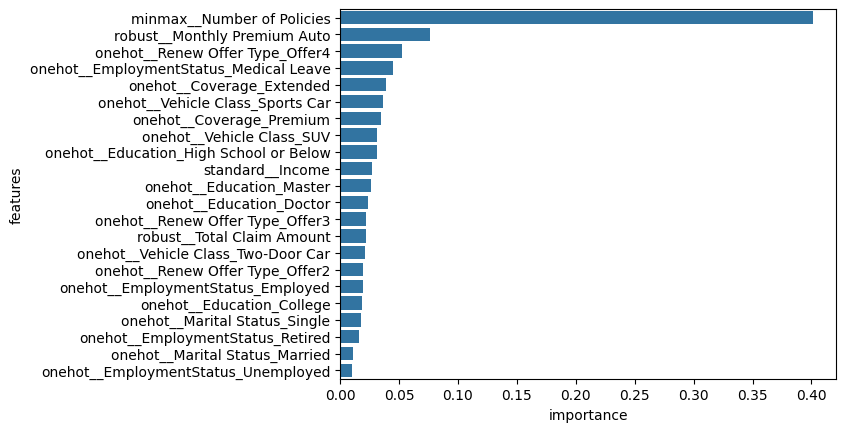

In [ ]:
sns.barplot(x = 'importance', y = 'features', data = df_feat_imp)

Fitur yang berpengaruh terhadap nilai CLV yaitu Number of Policies, sebesar 0.375 diikuti oleh Vehicle Class SUV sebesar 0.149. Hal ini dapat didefinisikan bahwa Number of Policies adalah jumlah produk asuransi yang dimiliki oleh pelanggan, semakin banyak produknya akan semakin tinggi CLV nya sehingga berpengaruh terhadap *feature importance* nya. Status pelanggan apakah masih bekerja atau sudah tidak bekerja, tidak memiliki pengaruh signifikan terhadap nilai CLVnya.

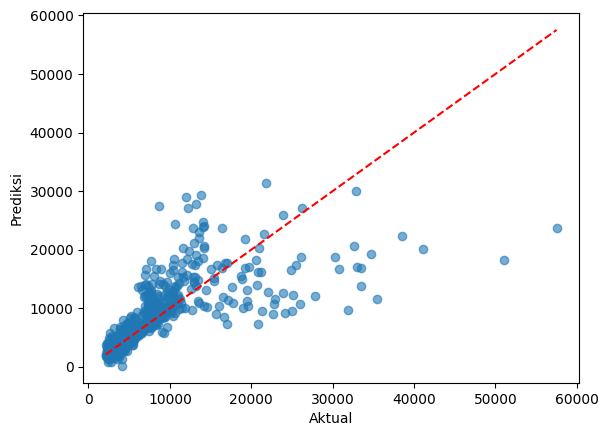

In [ ]:
#Melihat secara plotting seberapa baik model memprediksi CLV
plt.scatter(y_test_no_outliers, best_model.predict(X_test_no_outliers), alpha=0.6)
plt.plot([y_test_no_outliers.min(), y_test_no_outliers.max()],
         [y_test_no_outliers.min(), y_test_no_outliers.max()], 'r--')
plt.xlabel("Aktual")
plt.ylabel("Prediksi")
plt.show()


Dari hasil plotting di atas dapat disimpulkan bahwa model dapat memprediksi nilai CLV setidaknya dalam nilai kurang dari 20000.

In [ ]:
# Membuat dataframe antara residual dan prediksi
data_result = data[['Customer Lifetime Value']].copy()
data_result['yPred'] = best_model.predict(X)
data_result['residual'] = data_result['Customer Lifetime Value'] - data_result['yPred']

# 5 Hasil teratas
data_result.head()


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Customer Lifetime Value,yPred,residual
0,10083.486880,11119.209961,-1035.723081
1,4943.386117,5176.581543,-233.195426
2,11981.984810,11922.474609,59.510201
3,4550.856045,4495.218750,55.637295
4,2372.155492,2704.727051,-332.571559


Dapat dilihat dalam hasil di atas menunjukkan bahwa masih banyak kesalahan dalam memprediksi hasil. Prediksi dapat menghasilkan overprediction (ketika nilai positif) atau underprediction (nilai negatif).

Untuk melihat **komparansi antara nilai MAE sebelum dan sesudah menggunakan Machine Learning**, dapat dilihat sebagai berikut:

In [ ]:
# Ambil MAE dari model rule-based
print("MAE - Rule-Based Model (Before ML):")
print(df0['Train MAE Mean'].values[0])

# Ambil MAE dari model XGBoost terbaik (Tanpa Outlier)
mae_xgb_train = df2[df2['Model'] == 'XGBoost']['Train MAE Mean'].values[0]
print("MAE - XGBoost Best Model (After ML):")
print(mae_xgb_train)


MAE - Rule-Based Model (Before ML):
5228.386635582079
MAE - XGBoost Best Model (After ML):
535.7272


Dari kedua perbandingan tersebut, sangat jelas bahwa Machine Learning dapat menangkap kompleksitas antar fitur lebih baik, sekitar 10%, dibandingkan Rule Based Model (model sederhana). Selain itu, XGBoost dengan model terbaik (tanpa outlier) nilanya lebih mendekati aktualnya dibandingkan Rule Based Model.

# **Kesimpulan**

1. Model terbaik terletak di XBoost tanpa outlier sebelum dituning. Akan tetapi, apabila dibandingkan hasil antara dua hyperparameter tuning, hasil Random Search lebih baik dibandingkan Grid Search.
2. Nilai MSE paling baik jatuh kepada XGBoost sebelum dituning yaitu berkisar 535.727
3. Keuntungan dari penggunaan model XGBoost (tanpa outlier sebelum dituning) yaitu model telah dapat memprediksi sesuai dengan aktualnya pada nilai CLV kurang dari 20000 dengan estimasi waktu yang lebih cepat apabila dibandingkan dengan metode manual dengan ribuan data.

# **Rekomendasi**

Rekomendasi yang diberikan penulis adalah untuk model yang dapat dikembangkan selanjutnya serta untuk Toko Elektronik EL dalam kemajuan bisnisnya adalah sebagai berikut:

## **Model**

1. Gunakan cross validation untuk cek hasil data train apakah terdapat overfitting atau underfitting dalam tiap iterasi fold-nya.
2. Nilai outlier tidak perlu terburu-buru dihapus untuk melihat perbandingan model.
3. Matriks evaluasi yang digunakan lebih disesuaikan lagi kedepannya, dalam Toko Elektronik EL ingin melihat seberapa besar eror prediksi terhadap aktualnya.
4. Perhatikan juga parameter yang digunakan dalam hyperparameter tuning agar model tidak mengalami overfitting atau underfitting.

## **Bisnis**

**1. Fokuskan Marketing  Pelanggan Bernilai CLV Tinggi**

Toko Elektronik EL dapat mengidentifikasi pelanggan dengan CLV tinggi dan memprioritaskan mereka untuk kampanye pemasaran, program loyalitas, dan pelayanan khusus agar tetap loyal. Misalnya, dapat menawarkan diskon eksklusif, reward, atau akses prioritas.

**2. Pemasaran Sesuai Segmentasi**

Dalam upaya peningkatan nilai CLV pelanggan, dapat menggunakan data pelanggan, misalnya pelanggan berstatus karyawan dengan Income >20.000 perbulan, dapat ditawari dengan bentuk cross-selling, untuk asuransi rumah dan kendaraan.

**3. Monitor dan Update Model Secara Berkala**

Pelanggan seiring waktu dapat berubah perilakunya sehingga Toko El Elektronik dapat melakukan updaye secara berkala untuk mengetahui apakah nilai CLV pelanggan menjadi semakin tinggi atau sebaliknya.

#**Save Model**

In [ ]:
import joblib
from google.colab import files

# Simpan model atau pipeline
joblib.dump(pipeline, 'model_pipeline.joblib')

# Unduh hasilnya
files.download('model_pipeline.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>